In [4]:
#Import Python Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree 
from datetime import datetime, timedelta
import os
import json
import pandas as pd
import numpy as np
from pytz import common_timezones, all_timezones, timezone

In [5]:
# Define name and path of data file
input_file = 'activity_898238015_30.csv'
input_dir = os.path.join("/", "opt","jupyter","data","csv" )
input_file_path = os.path.join(input_dir , input_file)

output_file = 'activity_898238015_40.csv'
output_dir = os.path.join("/", "opt","jupyter","data","csv" )
output_file_path = os.path.join(input_dir , output_file)

print ("Input file is (full path)  ", input_file_path)
print ("Output file is (full path)  ", output_file_path)


Input file is (full path)   /opt/jupyter/data/csv/activity_898238015_30.csv
Output file is (full path)   /opt/jupyter/data/csv/activity_898238015_40.csv


In [6]:
# Load data file into a Pandas data frame for inspection
df = pd.read_csv(input_file_path, index_col = 'time',  parse_dates=True)

In [7]:
# Define and set data source time zone
tz_source = 'UTC'
# Set timezone in our data frame
df = df.tz_localize( tz_source )

In [8]:
# Convert to local time zone - Dublin, Ireland
tz_local = timezone('Europe/Dublin')
df = df.tz_convert(tz_local  )

In [200]:
start_time = min(df.index)
end_time = max(df.index)
datetime.strftime(start_time,'%H:%M on %A, %B %-d, %Y')
datetime.strftime(end_time,'%H:%M on %A, %B %-d, %Y')

print ( str(int((end_time-start_time).total_seconds()/3600) ))
print ( str(int ( ( (end_time-start_time).total_seconds()/3600 % 1 ) * 60) ) )
int ((( (end_time-start_time).total_seconds()/3600 % 1 ) * 60 % 1) * 60 )

5
6


11

In [205]:
moving_time = timedelta(seconds = len(df_moving))
print ( str(int((moving_time).total_seconds()/3600) ))
print ( str(int ( ( (moving_time).total_seconds()/3600 % 1 ) * 60) ) )
int ((( (moving_time).total_seconds()/3600 % 1 ) * 60 % 1) * 60 )

4
10


23

In [206]:
max(df.distance)

105730.9609375

In [9]:
df.head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
time,,,,,,,,,,,
2015-09-13 07:25:51+01:00,79.400002,76,5.010,103,53.363708,-6.190183,1,False,0.000,0.0000,False
2015-09-13 07:25:52+01:00,81.680002,77,9.626,104,53.363718,-6.190250,0,False,4.616,0.0000,False
2015-09-13 07:25:53+01:00,83.960002,79,14.242,104,53.363729,-6.190317,0,False,4.616,11.0784,True
2015-09-13 07:25:54+01:00,86.240002,80,18.858,105,53.363740,-6.190384,0,False,4.616,16.6176,True
2015-09-13 07:25:55+01:00,88.520003,82,23.474,105,53.363750,-6.190451,0,False,4.616,16.6176,True


In [173]:
plot_control = {'column':'breaks', 'axes_number':4, 'plot_color':'black', 
                'plot_title':'Breaks', 'xlabel': '', 'ylabel':'', 'ylimit_qty':0}



def plot_axes( df, plot_control ):

    df[ plot_control['column'] ].plot(ax=axes[ plot_control['axes_number']],
                kind='area',color= plot_control['plot_color'] ,alpha = .7); 
    axes[ plot_control['axes_number'] ].set_title( plot_control['plot_title'] );
    axes[ plot_control['axes_number'] ].set_xlabel( plot_control['xlabel'] );
    axes[ plot_control['axes_number'] ].set_ylabel( plot_control['ylabel'] );
    
    if plot_control['ylimit_qty'] > 0:
        axes[ plot_control['axes_number'] ].set_ylim( [min(df[ plot_control['column'] ]) - plot_control['ylimit_qty'], 
                                            max(df[ plot_control['column'] ]) + plot_control['ylimit_qty']])
    
    #format time labesl - show hour and minutes only
    axes[ plot_control['axes_number'] ].xaxis.set_minor_locator( dates.MinuteLocator(interval=10) )
    axes[ plot_control['axes_number'] ].xaxis.set_major_locator( dates.HourLocator() )
    axes[ plot_control['axes_number'] ].xaxis.set_major_formatter(dates.DateFormatter('%H:%M', tz=tz_local))
    #axes[ plot_control['axes_number'] ].set_xticklabels(axes[ plot_control['axes_number'] ].get_xticklabels(),rotation = 0)
    #axes[ plot_control['axes_number'] ].set_xlim((datetime(2015,9,13,6,0,0),datetime(2015,9,13,12,0,0 )))
    #axes[ plot_control['axes_number'] ].xaxis.set_tick_params(rotation = 0)
    
    for i in range ( len(axes[ plot_control['axes_number'] ].xaxis.get_ticklabels())):
        axes[  plot_control['axes_number']].xaxis.get_ticklabels()[i].set_rotation(0.0)
        axes[  plot_control['axes_number']].xaxis.get_ticklabels()[i].set_horizontalalignment('center')
    
def plot_stopages():
    df['moving'].apply(lambda x: 0 if x == 1 else 1).plot(ax=axes[5], kind='area', color='blue',alpha = .7); 
    axes[5].set_title('Stopped');
    axes[5].set_xlabel('');
    axes[5].set_ylabel('');

In [170]:
#dir(axes[0].xaxis)
#dir( axes[0].xaxis.get_ticklabels()[0] )

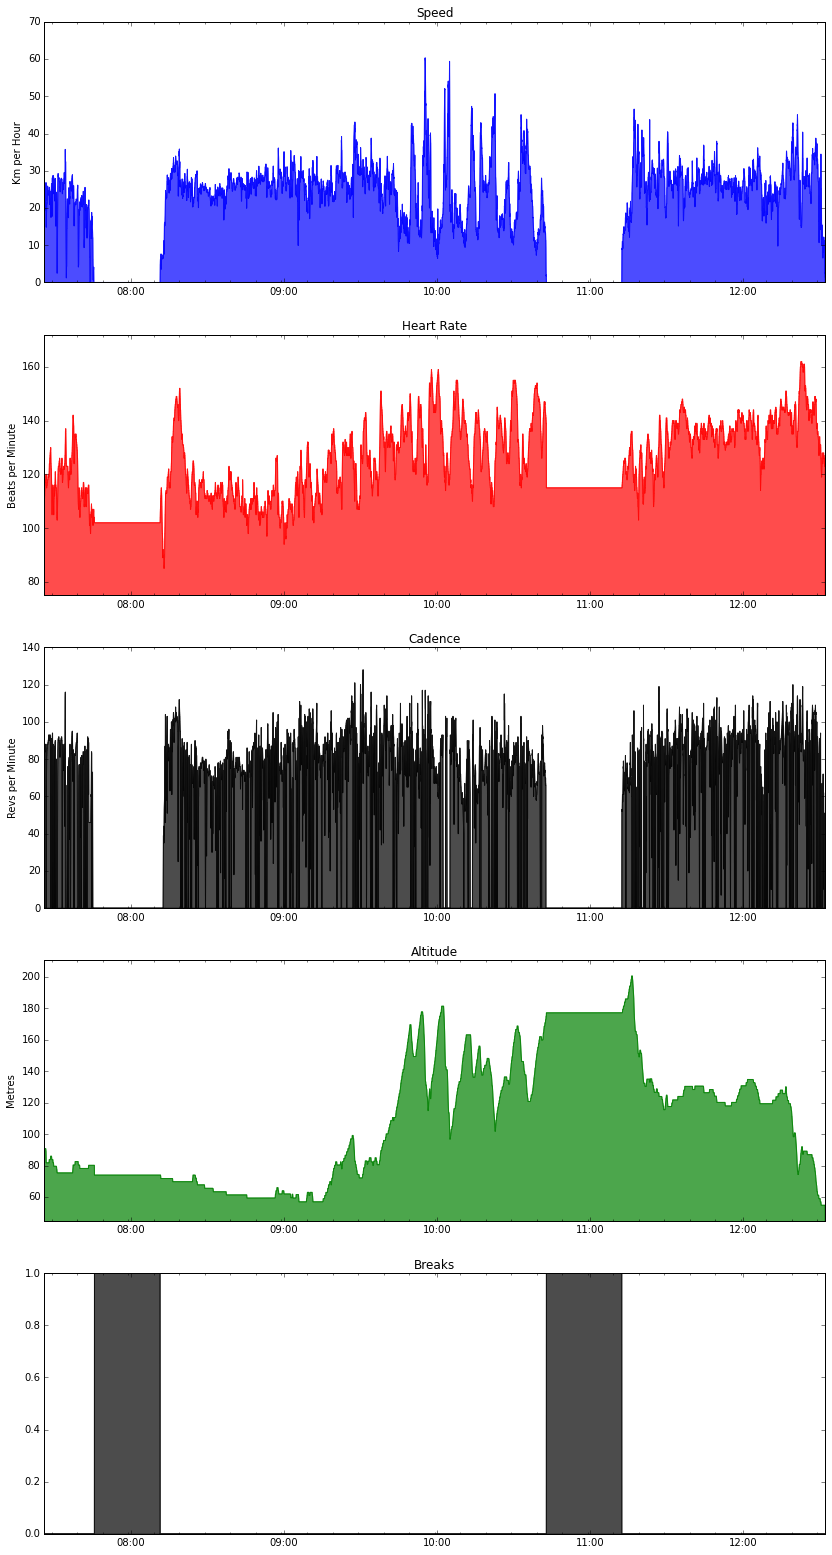

In [174]:
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(14, 30))

#Speed
import matplotlib.dates as dates

#axes[0].xaxis.set_major_formatter(dates.DateFormatter('%H:%M', tz=tz_local))
plot_control = {'column':'speed', 'axes_number':0, 'plot_color':'blue', 
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes(df, plot_control)


#Heart Rate
plot_control = {'column':'heart_rate', 'axes_number':1, 'plot_color':'red', 
                'plot_title':'Heart Rate', 'xlabel': '', 'ylabel':'Beats per Minute', 'ylimit_qty':10}
plot_axes(df, plot_control)


#Cadence
plot_control = {'column':'cadence', 'axes_number':2, 'plot_color':'black', 
                'plot_title':'Cadence', 'xlabel': '', 'ylabel':'Revs per Minute', 'ylimit_qty':0}
plot_axes(df, plot_control)


#Altitude
plot_control = {'column':'altitude', 'axes_number':3, 'plot_color':'green', 
                'plot_title':'Altitude', 'xlabel': '', 'ylabel':'Metres', 'ylimit_qty':10}
plot_axes(df, plot_control)

#breaks
plot_control = {'column':'breaks', 'axes_number':4, 'plot_color':'black', 
                'plot_title':'Breaks', 'xlabel': '', 'ylabel':'', 'ylimit_qty':0}
plot_axes(df, plot_control)

#Stoppage
#plot_stopages()



In [54]:
df_moving = df[df.moving].copy()
df_moving = df_moving.reset_index()

In [122]:
#df_moving.reset_index()
df_moving = df_moving.set_index(pd.timedelta_range('0 days',periods=len(df_moving),freq='s'))

In [55]:
df_moving.head()

,time,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
0,2015-09-13 07:25:53+01:00,83.960002,79,14.242000,104,53.363729,-6.190317,0,False,4.616000,11.078400,True
1,2015-09-13 07:25:54+01:00,86.240002,80,18.858000,105,53.363740,-6.190384,0,False,4.616000,16.617600,True
2,2015-09-13 07:25:55+01:00,88.520003,82,23.474000,105,53.363750,-6.190451,0,False,4.616000,16.617600,True
3,2015-09-13 07:25:56+01:00,90.800003,83,28.090000,106,53.363761,-6.190519,5,False,4.616000,16.617600,True
4,2015-09-13 07:25:57+01:00,90.800003,84,34.740002,106,53.363779,-6.190614,1,False,6.650002,19.058402,True


In [66]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

def hours(x, pos):
    'The two args are the value and tick position'
    return '{:02d}:00'.format(int(x /3600))

def plot_axes2( df, plot_control ):
    majorLocator   = MultipleLocator(3600)
    minorLocator   = MultipleLocator(900)
    formatter = FuncFormatter(hours)

    df[ plot_control['column'] ].plot(ax=axes[ plot_control['axes_number']],
                kind='area',color= plot_control['plot_color'] ,alpha = .7); 
    axes[ plot_control['axes_number'] ].set_title( plot_control['plot_title'] );
    axes[ plot_control['axes_number'] ].set_xlabel( plot_control['xlabel'] );
    axes[ plot_control['axes_number'] ].set_ylabel( plot_control['ylabel'] );
    
    if plot_control['ylimit_qty'] > 0:
        axes[ plot_control['axes_number'] ].set_ylim( [min(df[ plot_control['column'] ]) - plot_control['ylimit_qty'], 
                                            max(df[ plot_control['column'] ]) + plot_control['ylimit_qty']])
    
    axes[plot_control['axes_number']].xaxis.set_major_locator(majorLocator)
    axes[plot_control['axes_number']].xaxis.set_minor_locator(minorLocator)
    axes[plot_control['axes_number']].xaxis.set_major_formatter(formatter)
    
    #axes[ plot_control['axes_number'] ].set_xlim((datetime(2015,9,13,6,0,0),datetime(2015,9,13,12,0,0 )))

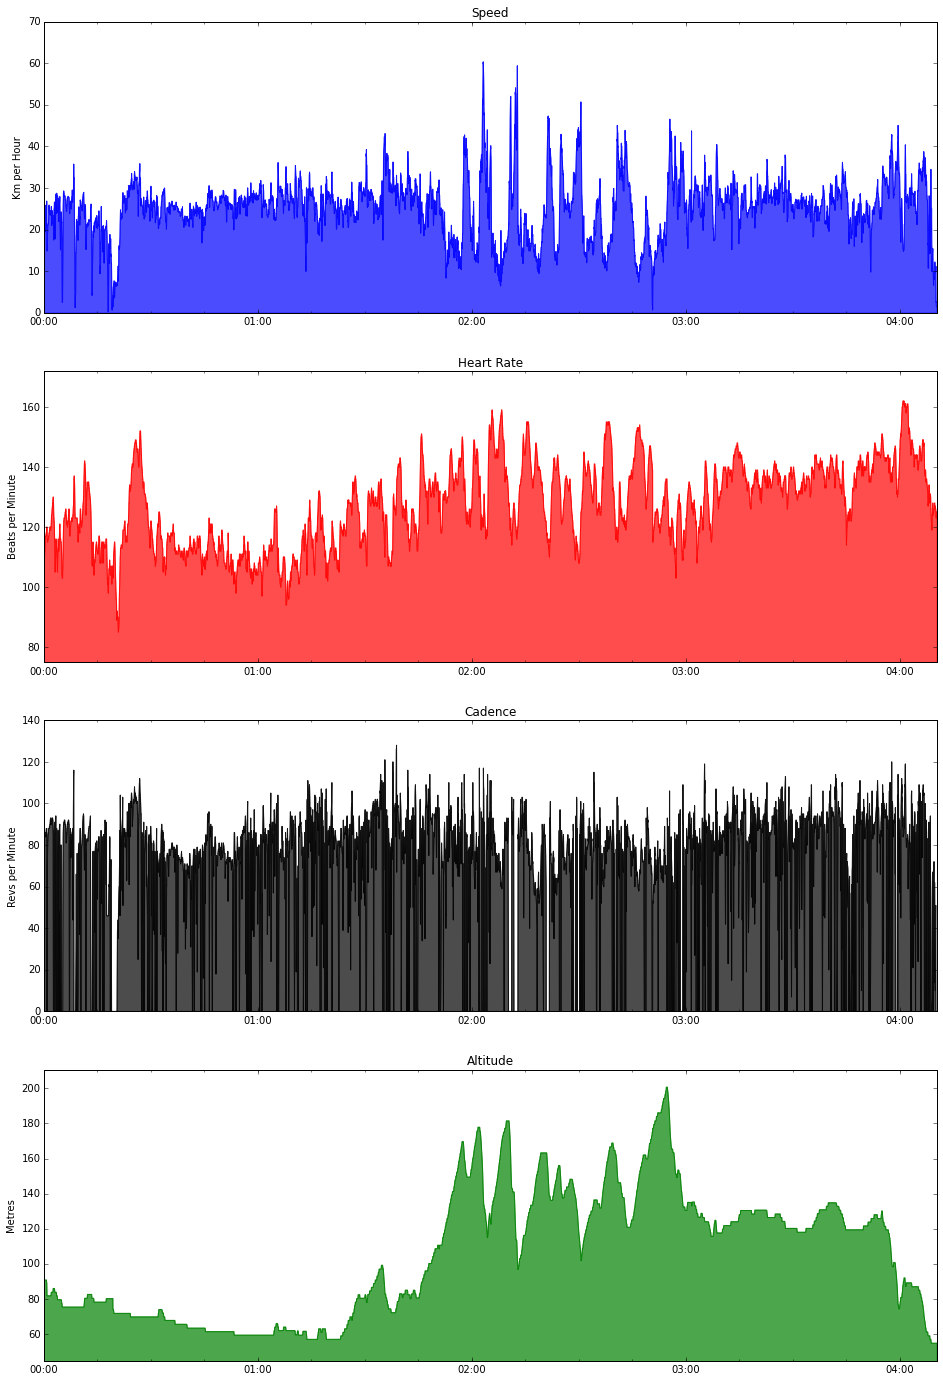

In [114]:
fig, axes = plt.subplots(nrows=4, ncols=1,  figsize=(16, 24))

#Speed
plot_control = {'column':'speed', 'axes_number':0, 'plot_color':'blue', 
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes2(df_moving, plot_control)

#Heart Rate
plot_control = {'column':'heart_rate', 'axes_number':1, 'plot_color':'red', 
                'plot_title':'Heart Rate', 'xlabel': '', 'ylabel':'Beats per Minute', 'ylimit_qty':10}
plot_axes2(df_moving, plot_control)

#Cadence
plot_control = {'column':'cadence', 'axes_number':2, 'plot_color':'black', 
                'plot_title':'Cadence', 'xlabel': '', 'ylabel':'Revs per Minute', 'ylimit_qty':0}
plot_axes2(df_moving, plot_control)


#Altitude
plot_control = {'column':'altitude', 'axes_number':3, 'plot_color':'green', 
                'plot_title':'Altitude', 'xlabel': '', 'ylabel':'Metres', 'ylimit_qty':10}
plot_axes2(df_moving, plot_control)

In [143]:
x = [123, 789, 1111, 1988, 2111, 2888]
for num in x:
    print(str(int (num / 1000) ) )

0
0
1
1
2
2


In [168]:
def kms(x, pos):
    'The two args are the value and tick position'
    return '{}'.format(int(x /1000))


def plot_axes3( df, plot_control ):
    
    formatter = FuncFormatter(kms)
    
    df[ [ 'interval10', plot_control['column']]  ].groupby('interval10').mean().\
        plot(ax=axes[ plot_control['axes_number']],
        kind='area',color= plot_control['plot_color'] ,alpha = .7); 
       
    #axes[ plot_control['axes_number'] ].plot (df_moving.distance, df[plot_control['column']] 
    #            kind='area',color= plot_control['plot_color'] ,alpha = .7); 
    #df[ plot_control['column'] ].plot(ax=axes[ plot_control['axes_number']],
    #            kind='area',color= plot_control['plot_color'] ,alpha = .7); 
       
    axes[ plot_control['axes_number'] ].set_title( plot_control['plot_title'] );
    axes[ plot_control['axes_number'] ].set_xlabel( plot_control['xlabel'] );
    axes[ plot_control['axes_number'] ].set_ylabel( plot_control['ylabel'] );
    
    axes[plot_control['axes_number']].xaxis.set_major_formatter(formatter)
    
    if plot_control['ylimit_qty'] > 0:
        axes[ plot_control['axes_number'] ].set_ylim( [min(df[ plot_control['column'] ]) - plot_control['ylimit_qty'], 
                                            max(df[ plot_control['column'] ]) + plot_control['ylimit_qty']])
    
 
    
    #axes[ plot_control['axes_number'] ].set_xlim((datetime(2015,9,13,6,0,0),datetime(2015,9,13,12,0,0 )))

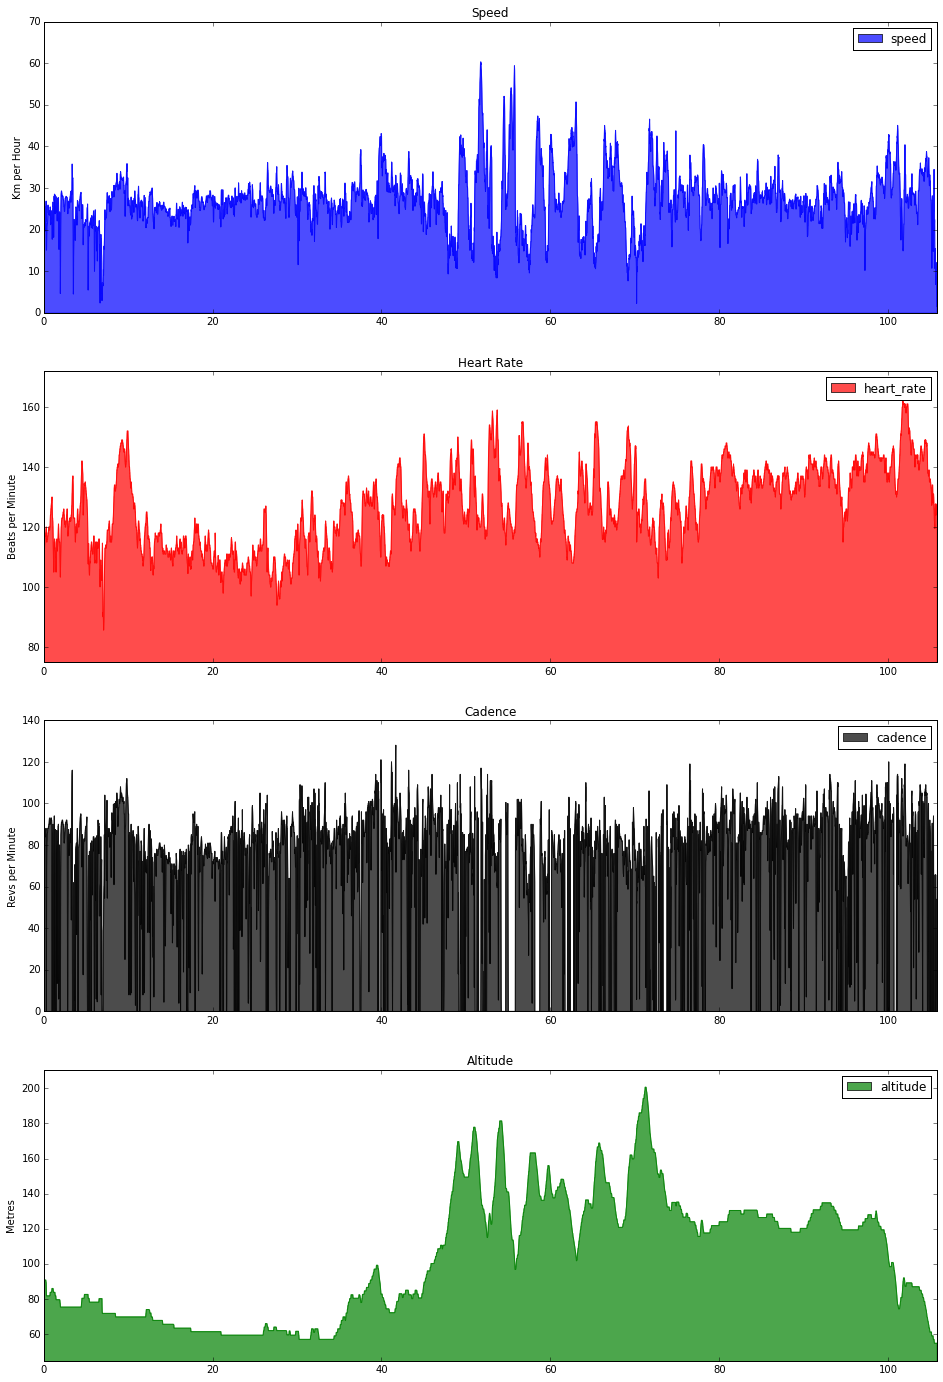

In [169]:
fig, axes = plt.subplots(nrows=4, ncols=1,  figsize=(16, 24))

#Speed
plot_control = {'column':'speed', 'axes_number':0, 'plot_color':'blue', 
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes3(df_moving, plot_control)

#Heart Rate
plot_control = {'column':'heart_rate', 'axes_number':1, 'plot_color':'red', 
                'plot_title':'Heart Rate', 'xlabel': '', 'ylabel':'Beats per Minute', 'ylimit_qty':10}
plot_axes3(df_moving, plot_control)

#Cadence
plot_control = {'column':'cadence', 'axes_number':2, 'plot_color':'black', 
                'plot_title':'Cadence', 'xlabel': '', 'ylabel':'Revs per Minute', 'ylimit_qty':0}
plot_axes3(df_moving, plot_control)


#Altitude
plot_control = {'column':'altitude', 'axes_number':3, 'plot_color':'green', 
                'plot_title':'Altitude', 'xlabel': '', 'ylabel':'Metres', 'ylimit_qty':10}
plot_axes3(df_moving, plot_control)

In [97]:
df_moving['interval10'] = df_moving.distance.apply(lambda x: (int (x / 10) + 1) * 10 )
#df_moving['interval1000'] = df_moving.distance.apply(lambda x: int (x /1000))
#df_moving['interval100'] = df_moving.distance.apply(lambda x: int (x /100))

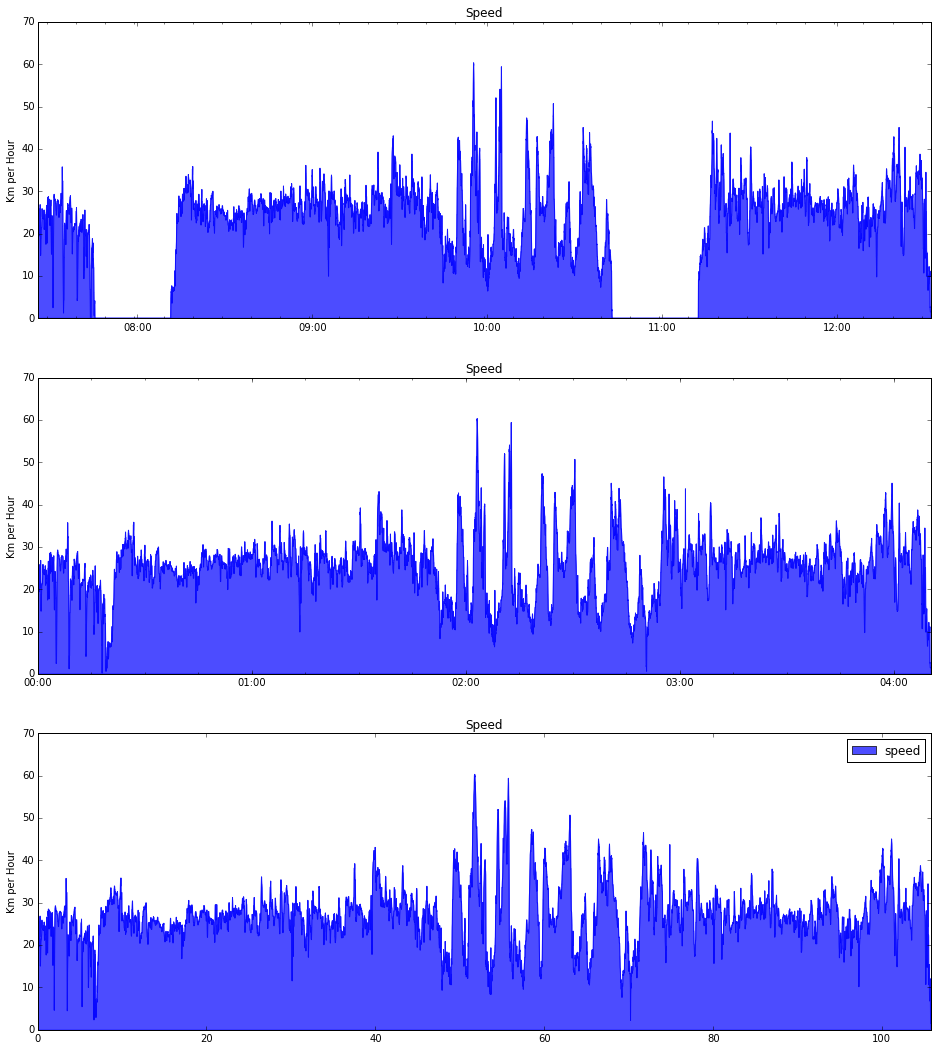

In [176]:
fig, axes = plt.subplots(nrows=3, ncols=1,  figsize=(16, 20))

#Speed
plot_control = {'column':'speed', 'axes_number':0, 'plot_color':'blue', 
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes(df, plot_control)

#Speed
plot_control = {'column':'speed', 'axes_number':1, 'plot_color':'blue', 
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes2(df_moving, plot_control)

#Speed
plot_control = {'column':'speed', 'axes_number':2, 'plot_color':'blue', 
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes3(df_moving, plot_control)

In [98]:
df_moving.head()

,time,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving,interval10
0,2015-09-13 07:25:53+01:00,83.960002,79,14.242000,104,53.363729,-6.190317,0,False,4.616000,11.078400,True,20
1,2015-09-13 07:25:54+01:00,86.240002,80,18.858000,105,53.363740,-6.190384,0,False,4.616000,16.617600,True,20
2,2015-09-13 07:25:55+01:00,88.520003,82,23.474000,105,53.363750,-6.190451,0,False,4.616000,16.617600,True,30
3,2015-09-13 07:25:56+01:00,90.800003,83,28.090000,106,53.363761,-6.190519,5,False,4.616000,16.617600,True,30
4,2015-09-13 07:25:57+01:00,90.800003,84,34.740002,106,53.363779,-6.190614,1,False,6.650002,19.058402,True,40


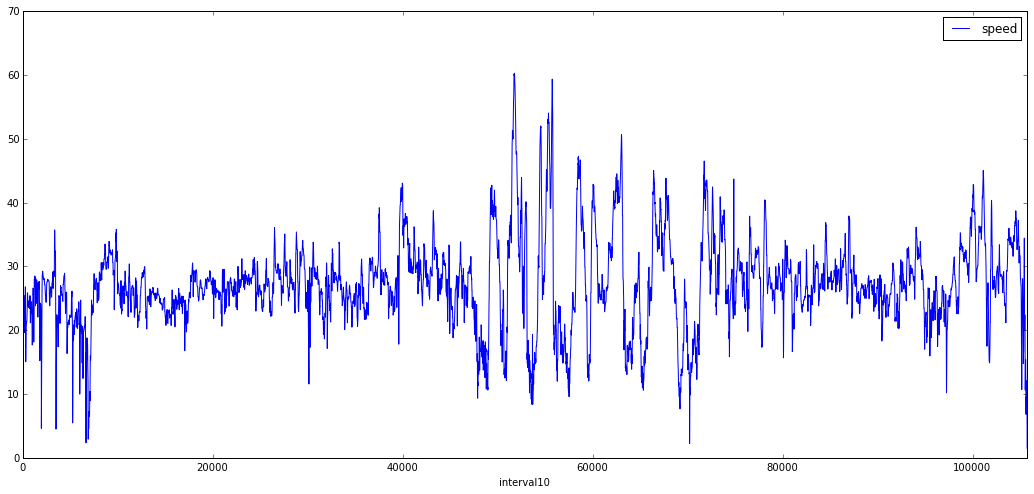

In [99]:
df_moving[['interval10','speed']].groupby('interval10').mean().plot(figsize=(18, 8))

In [112]:
df_moving[['interval10','heart_rate']].groupby('interval10').mean().tail()

,heart_rate
interval10,
105700,127.000000
105710,126.250000
105720,126.000000
105730,124.090909
105740,124.666667


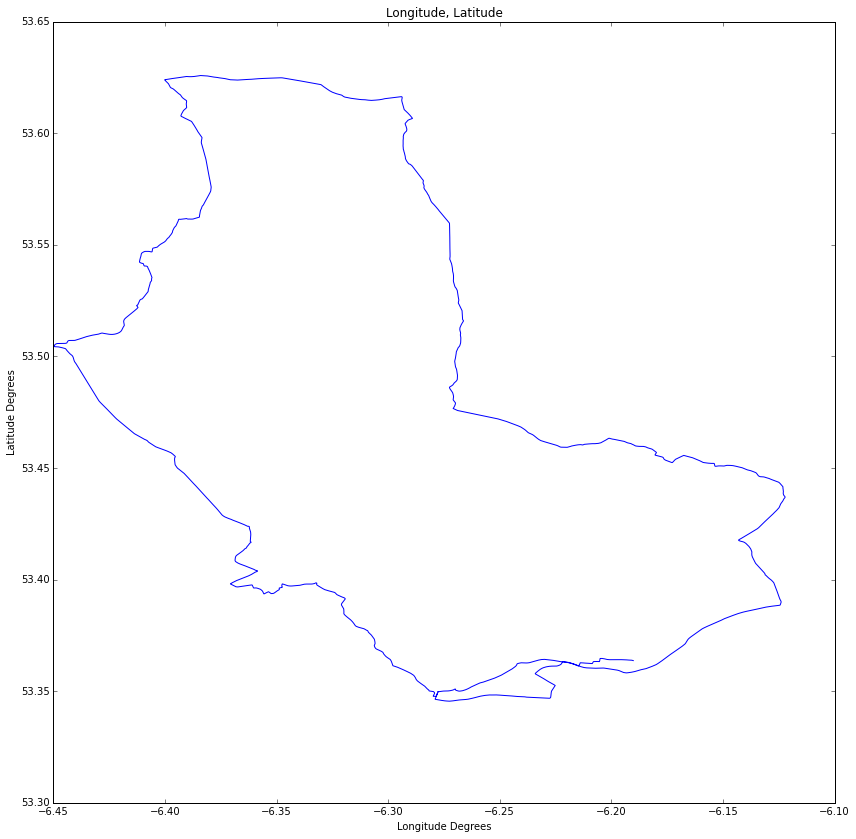

In [113]:
# new style method 2; use an axes array

fig2, axs2 = plt.subplots(1,1,  figsize=(14, 14))
axs2.set_title('Longitude, Latitude')
axs2.set_xlabel('Longitude Degrees')
axs2.set_ylabel('Latitude Degrees')
_ = axs2.plot(df.longitude, df.latitude)

In [103]:
df[ ( ~df.breaks) & (~df.moving)].tail()

,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
time,,,,,,,,,,,
2015-09-13 07:45:36+01:00,80.199997,0,6910.22998,104,53.349805,-6.277627,0,False,0,0,False
2015-09-13 07:45:37+01:00,80.199997,0,6910.22998,104,53.349804,-6.277628,0,False,0,0,False
2015-09-13 07:45:38+01:00,80.199997,0,6910.22998,104,53.349804,-6.277630,0,False,0,0,False
2015-09-13 07:45:39+01:00,80.199997,0,6910.22998,104,53.349803,-6.277631,0,False,0,0,False
2015-09-13 07:45:40+01:00,80.199997,0,6910.22998,104,53.349803,-6.277632,10,False,0,0,False
